# Lecture 17 - Random Numbers in Python & Monte Carlo - HW 8

## 1) Random Numbers and Radio Activity

The isotope $^{213}$Bi decays to stable $^{209}$Bi via one of two different routes, with probabilities and
half-lives thus

<img src="Decay9.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />

(Technically, $^{209}$Bi isnt really stable, but it has a half-life of more than $10^{19}$ years, a billion
times the age of the universe, so it might as well be.)

Starting with a sample consisting of 10,000 atoms of $^{213}$Bi, simulate the decay of the atoms
by dividing time into slices of length $\delta t = 1$s each and on each step doing
the following:

1. For each atom of $^{209}$Pb in turn, decide at random, with the appropriate probability, whether it decays or not. (The probability can be calculated from $p(t) = 1 − 2t/\tau $, where $\tau$ is the half life.) Count the total number that decay, subtract it from the number of $^{209}$Pb atoms, and add it to the number of $^{209}$Bi atoms.

2. Now do the same for $^{209}$Tl, except that decaying atoms are subtracted from the total for $^{209}$Tl and added to the total for $^{209}$Pb.

3. For $^{213}$Bi the situation is more complicated: when a $^{213}$Bi atom decays you have to decide at random with the appropriate probability the route by which it decays. Count the numbers that decay by each route and add and subtract accordingly.

Note that you have to work up the chain from the bottom like this, not down from the top,
to avoid inadvertently making the same atom decay twice on a single step.

Keep track of the number of atoms of each of the four isotopes at all times for 20,000 seconds
and make a single graph showing the four numbers as a function of time on the same axes.



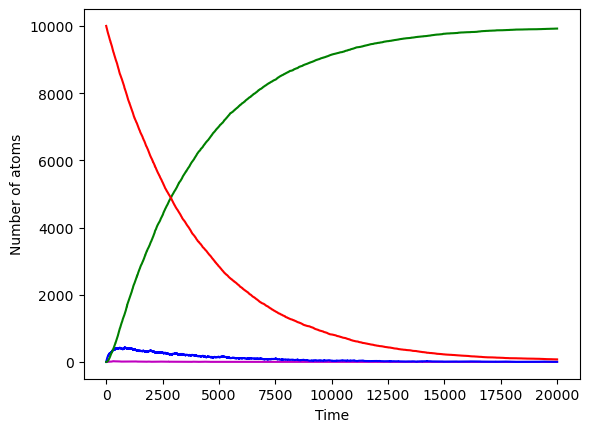

In [14]:
# Write Code Here   
import numpy as np
from numpy import arange
from pylab import plot,xlabel,ylabel,show

# Constants
NBi213 = 10000          # Initial number of Bizmuth atoms, decrease it an it will look more blocky
NBi209 = 0              # Initial number of Bizmuth209 atoms
NPb = 0                 # Number of lead atoms
NTl = 0                 # Number of Thalium atoms
half_biz = 46*60        # Half life of bizmuth in seconds
half_lead = 2.2*60      # Half life of lead in seconds
half_thal = 3.3*60      # Half life of thaliumm in seconds
h = 1.0                 # Size of time-step in seconds
pBi = 1 - 2**(-h/half_biz)    # Probability of bizmuth decay in one step
pPb = 1 - 2**(-h/half_lead)   # Probability of lead decay in one step
pTl = 1 - 2**(-h/half_thal)   # Probability of thalium decay in one step
tmax = 20000            # Total time

# Lists of plot points
tpoints = arange(0.0,tmax,h) # make time array
Bi209points = [] # empty array to strore # of Bi atoms at each time step
Bi213points = [] # empty array to strore # of Bi atoms at each time step
Pbpoints = [] # empty array to strore # of Pb atoms at each time step
Tlpoints = [] # empty array to strore # of Tl atoms at each time step

# Main loop
for t in tpoints:    # for time 0-1000 sec
    Bi209points.append(NBi209) # append starting # of Bi atoms
    Bi213points.append(NBi213) # append starting # of Bi atoms
    Tlpoints.append(NTl) # append starting # of Tl atoms
    Pbpoints.append(NPb) # append starting # of Pb atoms
   
    # Calculate the number of atoms that decay
    
    decay = 0 #shows that nothing has decayed yet, needs to be reset for each loop
    for i in range(NPb): # determine number of lead atoms that decay into bizmuth209
        if np.random.random() < pPb:
            decay += 1
    NPb -= decay 
    NBi209 += decay
###################
    decay = 0
    for i in range(NTl): # determine number of thalium atoms that decay into lead
        if np.random.random() < pTl:
            decay += 1
    NTl -= decay
    NPb += decay
####################
    decay = 0
    for i in range(NBi213): #determine number of bizmuth atoms that decay into lead and thalium
        if np.random.random() < pBi:
            decay += 1 
            if np.random.random() < .0209: #decays to thalium
                NTl += 1
            else: #decays to lead
                NPb += 1
    NBi213 -= decay

# Make the graph
plot(tpoints,Tlpoints, c='m') # plot Tl vs. time
plot(tpoints,Pbpoints, c='b') # plot Pb vs. time
plot(tpoints,Bi209points, c='g') # plot Bi vs. time
plot(tpoints,Bi213points, c='r') # plot Bi vs. time
xlabel("Time")
ylabel("Number of atoms")
show()

## 2) Lets Make a Deal
Monte Carlo methods are often useful to ensure that our thinking is reasonable. A good
example of this kind of use is to investigate a simple problem that generated much attention
several years ago and for which many mathematicians obtained an incorrect solution.

The problem was the analysis of the optimal strategy in a television game show popular at
the time. The show was Lets Make a Deal with host Monty Hall. At some point in the show,
a contestant was given a choice of selecting one of three possible items, each concealed behind
one of three closed doors. The items varied considerably in value.

After the contestant made a choice but before the chosen door was opened, the
host, who knew where the most valuable item was, would open one of the doors
not selected and reveal a worthless item.

**The host would then offer to let the contestant select a different door from what was originally
selected. The question, of course, is should the contestant switch?**

<img src="Monty_Hall_Problem.jpg" alt="Decay process for Bi213 to Bi209" title="Bismuth Decay" />



Much interest in this problem was generated when it was analyzed by a popular magazine
writer, Marilyn vos Savant, who concluded that the optimal strategy is to switch. This
strategy is counterintuitive to many mathematicians, who would say that there is nothing to
be gained by switching; that is, that the probability of improving the selection is 0.5. Study
this problem by Monte Carlo methods. Be careful to understand all of the assumptions

**Write a code that implement this test for 1000 “games”, 500 where the contestant choose to KEEP their choice of door, and 500 where contestant chooses to CHANGE their choice of door:**


## Determine if there is probability of improving the selection by switching, and if so by how much?



In [19]:
# Write Code Here
import random

# Simulate one round of the Monty Hall problem where the contestant does not switch
def stay():
    doors = ['goat', 'goat', 'car']               # Two doors with goats, one with a car
    random.shuffle(doors)                         # Randomize the location of the car
    contestant_choice = random.choice([0, 1, 2])  # Contestant makes a random choice
   
    # Host opens a door with a goat that was not chosen
    host_choice = next(i for i in range(3) 
        if i != contestant_choice and doors[i] == 'goat')
    return doors[contestant_choice] == 'car'      # Win if the contestant's original choice is the car

# Simulate one round of the Monty Hall problem where the contestant switches
def switch():
    doors = ['goat', 'goat', 'car']               # Two doors with goats, one with a car
    random.shuffle(doors)                         # Randomize the location of the car
    contestant_choice = random.choice([0, 1, 2])  # Contestant makes a random choice
    
    # Host opens a door with a goat that was not chosen
    host_choice = next(i for i in range(3)
        if i != contestant_choice and doors[i] == 'goat')
   
    # Contestant switches to the remaining unopened door
    switch_choice = next(i for i in range(3) 
        if i != contestant_choice and i != host_choice)
    return doors[switch_choice] == 'car'          # Win if the contestant's new choice is the car

# Run the Monte Carlo simulation
def monte_carlo_simulation(num_games=1000):
    num_stay_wins = 0
    num_switch_wins = 0
    num_switch_games = num_games // 2             # 500 games where contestant switches
    num_stay_games = num_games // 2          # 500 games where contestant does not switch

    # Simulate games where the contestant does not switch
    for i in range(num_stay_games):
        if stay():
            num_stay_wins += 1

    # Simulate games where the contestant switches
    for i in range(num_switch_games):
        if switch():
            num_switch_wins += 1

    # Calculate win rates
    stay_win_rate = (num_stay_wins / num_stay_games) * 100
    switch_win_rate = (num_switch_wins / num_switch_games) * 100

    # Print results with win counts and percentages
    print(f"Number of wins without switching: {num_stay_wins} out of {num_stay_games}")
    print(f"Number of wins with switching: {num_switch_wins} out of {num_switch_games}")
    print(f"Win rate without switching: {stay_win_rate:.2f}%")
    print(f"Win rate with switching: {switch_win_rate:.2f}%")

    # Determine which strategy wins more often
    if switch_win_rate > stay_win_rate:
        print("Switching wins more often.")
    else:
        print("Staying wins more often.")

# Run the simulation and print the results
monte_carlo_simulation(1000)


Number of wins without switching: 171 out of 500
Number of wins with switching: 326 out of 500
Win rate without switching: 34.20%
Win rate with switching: 65.20%
Switching wins more often.


^^^Need to make it
random (1,3)
500 games where you stay
500 times where you switch
find out which one you win in more often
record number of wins for each case and divide that by 500